# Selecting a population size

The aim of this demonstration is to help you select a population size for you genetic algorithm. We will use Rosenbrock's banana function.

This is defined by:

$f(x,y) = (a-x)^2 + b(y - x^2)^2$

For the constants $a = 1$ and $b = 100$, the minimum is at (1,1).

$f(1,1) = 0$
<p align = "center">
  <img src="Rosenbrock_function.png" width="40%">
</p>

Image source:[wikipedia](https://en.wikipedia.org/wiki/Rosenbrock_function) 

In [1]:
import gaga as ga
from matplotlib import rc
rc('animation', html='html5')

results_folder = 'demo-population-size'

genes = {'x':(-2, 2),
        'y':(-1, 3)}

def evaluate(individual):

    # constants
    a = 1
    b = 100

    #  unpack chromosome
    x = individual.genes['x']
    y = individual.genes['y']

    individual.fitness_score = (pow(a - x, 2) + b * pow(y - pow(x, 2), 2))

### Small population

When the population size is too small, the ga is extremely sensitive to initial conditions. Try changing the seed to see what happens.

For a small population size, you generally want to set ``mutate`` and ``sigma`` to be large to encourage exploration.

#### Not enough exploration
``mutate`` and ``sigma`` are too low

<Figure size 432x288 with 0 Axes>

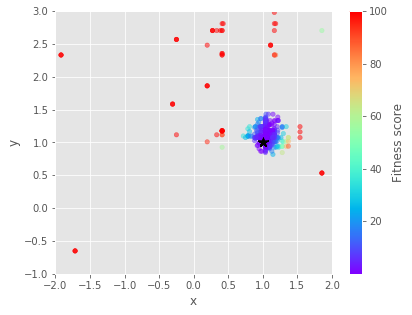

In [2]:
seed = 0
sim = ga.ga(genes, 
            evaluate,
            population_size = 10,
            results_folder = results_folder)
sim.run_simulation(seed = seed)
anim = sim.results.animate('x', 'y', bounds = [-2, 2, -1, 3], s = 20, optimum = [1, 1], fmax = 100, filename = "small_pop_low_exp_{}".format(seed))

#### Good amount of exploration

<Figure size 432x288 with 0 Axes>

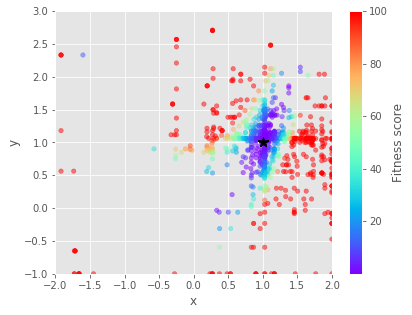

In [3]:
seed = 0
sim = ga.ga(genes, 
            evaluate,
            mutate = 0.6,
            sigma = 0.3,
            population_size = 10,
            results_folder = results_folder)
sim.run_simulation(seed = seed)
anim = sim.results.animate('x', 'y', bounds = [-2, 2, -1, 3], s = 20, optimum = [1, 1], fmax = 100, filename = "small_pop_{}".format(seed))

## Large population size

A large population will sample the initial search space well making it more resilient to initial conditions. However, a large population may be slow to move and slow to update as the population will be diluted with bad genes, so you may want to use a high ``winrate`` and larger ``clone``. It is also computationally expensive to produce a lot of individuals.

#### Selection pressure too low
```winrate``` and ```clone``` too small

<Figure size 432x288 with 0 Axes>

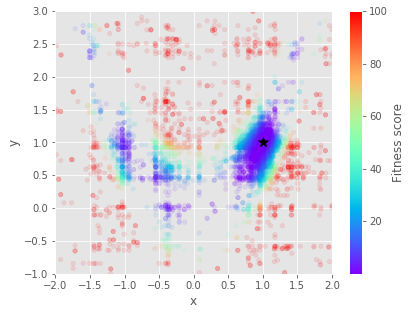

In [4]:
seed = 0
sim = ga.ga(genes, 
            evaluate,
            population_size = 100,
            results_folder = results_folder)
sim.run_simulation(seed = seed)
anim = sim.results.animate('x', 'y', bounds = [-2, 2, -1, 3], alpha = 0.1, s = 20, optimum = [1, 1], fmax = 100, filename = "large_pop_low_sel_{}".format(seed))

#### Good selection pressure

<Figure size 432x288 with 0 Axes>

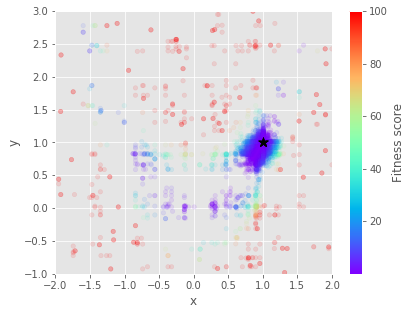

In [5]:
seed = 0
sim = ga.ga(genes, 
            evaluate,
            population_size = 100,
            winrate = 0.9,
            clone = 5,
            results_folder = results_folder)
sim.run_simulation(seed = seed)
anim = sim.results.animate('x', 'y', bounds = [-2, 2, -1, 3], alpha = 0.1, s = 20, optimum = [1, 1], fmax = 100, filename = "large_pop_{}".format(seed))